##Trabajo Práctico MÓDULO 2: Aprendizaje Supervisado

## Primera Tarea
Cargar la librería pandas y el set de datos a continuación.

*Nota: pueden agregar librerías y utilizar todas las herramientas estudiadas para "entender" los datos y/o hacer ingeniería de variables (conversión de algunos tipos) si es necesario. Aunque no se requiere y se sugiere "descartar" el análisis de outliers, pueden (una vez que terminen el práctico) verificar si existen o no outliers y, en caso de detectarlos, tratarlos para comparar resultados.*

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder 

In [38]:
# Cambiar según dónde tengan el set de datos
df=pd.read_csv('C:/Documentos/CURSOS/Diplomatura en Data Science Aplicada/TPS entregados/TP2/telecom_churn.csv')

In [39]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False



* **State**: Abreviatura del estado (como KS = Kansas)
* **Account length**: Cuánto tiempo lleva el cliente con la empresa
* **Area code**: Prefijo del número de teléfono
* **International plan**: Plan internacional (activado/desactivado)
* **Voice mail plan**: Plan de correo de voz (activado/desactivado)
* **Number vmail messages**: Número de mensajes de correo de voz
* **Total day minutes**: Duración total de las llamadas diurnas
* **Total day calls** Número total de llamadas diurnas
* **Total day charge**: Cargo total por servicios diurnos
* **Total eve minutes**: Duración total de las llamadas de la tarde
* **Total eve calls**: Total de llamadas de la tarde
* **Total eve charge**: Cargo total por servicios de la tarde
* **Total night minutes**: Duración total de las llamadas de la noche
* **Total night calls**: Número total de llamadas nocturnas
* **Total night charge**: Cargo total por servicios nocturnos
* **Total intl minutes**: Duración total de llamadas internacionales
* **Total intl calls**: Número total de llamadas internacionales
* **Total intl charge**: Cargo total por llamadas internacionales
* **Customer service calls**: Número de llamadas al servicio al cliente
* **Churn**: Estado de la relación del cliente con la compañía



## Ejercicio

Se pide:

* Determinar la columna objetivo.
* Determinar una matriz de atributos o caracteríticas adecuada.
* Determinar la aplicación de modelos de regresión o clasificación.
* Crear y entrenar al menos 2 de los modelos estudiados.
* Obtener las métricas de al menos uno de los dos modelo para un set de datos de test.
El uso de pipelines o el de técnicas de validación cruzada (como GridSearchCV) para el ajuste de hiperparámetros no son requeridos, pero pueden utilizarlos si así lo desean.

#Analisis EDA

In [40]:
df.shape

(3333, 20)

In [41]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

#Conversión de datos tipo object y boolean a int:

In [42]:
df['International plan'] = df['International plan'].map({'Yes': 1, 'No': 0})
df['Voice mail plan'] = df['Voice mail plan'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].astype(int)

#Borrar columna State y ID

In [43]:
df = df.drop('State', axis=1)

In [44]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#Correlación

In [45]:
correlation_matrix = df.corr()
churn_correlation = correlation_matrix['Churn']
churn_correlation_sorted = churn_correlation.sort_values(ascending=False)
print(churn_correlation_sorted)

Churn                     1.000000
International plan        0.259852
Customer service calls    0.208750
Total day minutes         0.205151
Total day charge          0.205151
Total eve minutes         0.092796
Total eve charge          0.092786
Total intl charge         0.068259
Total intl minutes        0.068239
Total night charge        0.035496
Total night minutes       0.035493
Total day calls           0.018459
Account length            0.016541
Total eve calls           0.009233
Area code                 0.006174
Total night calls         0.006141
Total intl calls         -0.052844
Number vmail messages    -0.089728
Voice mail plan          -0.102148
Name: Churn, dtype: float64


#Selección de atributos para el modelo

In [46]:
X = df[['International plan', 'Customer service calls']] 

In [47]:
y=df['Churn']

In [48]:
X = X.values

In [49]:
y = y.values

In [50]:
X,y

(array([[0, 1],
        [0, 1],
        [0, 0],
        ...,
        [0, 2],
        [1, 2],
        [0, 0]], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0]))

#Split Dataset

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=33)

In [52]:
print('Cantidad de datos para entrenamiento: ', len(X_train))
print('Cantidad de datos para test: ', len(X_test))

Cantidad de datos para entrenamiento:  2666
Cantidad de datos para test:  667


# Regresión Logística

In [53]:
classifier = LogisticRegression()

In [54]:
classifier.fit(X_train, y_train)

LogisticRegression()

#El objeto `classifier` contiene el modelo ya entrenado. Sus parámetros son: $$ h(x) = \frac{1}{1 + e^{-(w_0 + w_1 x_1 + w_2 x_2)}}$$

In [55]:
print('Vector de coeficientes de la función lineal: ', classifier.coef_)
print('Ordenada en el origen (W0): ', classifier.intercept_)

Vector de coeficientes de la función lineal:  [[1.94248228 0.44381148]]
Ordenada en el origen (W0):  [-2.8470564]


#Ahora se va a corroborar como funciona el modelo con los datos de entrenamiento

In [56]:
y_pred_train = classifier.predict(X_train)

In [57]:
print('Etiquetas de train reales:    ', y_train[:20])
print('Etiquetas de train predichas: ', y_pred_train[:20])

Etiquetas de train reales:     [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1]
Etiquetas de train predichas:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


#Siendo el Score:

In [58]:
classifier.score(X_train, y_train)

0.8518379594898725

#Ahora veeremos el desempeño del test: 

In [59]:
y_pred_test = classifier.predict(X_test)

In [60]:
print('Etiquetas de test reales:    ', y_test[:20])
print('Etiquetas de test predichas: ', y_pred_test[:20])

Etiquetas de test reales:     [0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0]
Etiquetas de test predichas:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [61]:
print('Accuracy en test: ', classifier.score(X_test, y_test))

Accuracy en test:  0.8740629685157422


#Además de las predicciones, se pueden obtener las probabilidades: 

In [62]:
probabilidades = classifier.predict_proba(X_test)

In [63]:
np.round(probabilidades, decimals=2)

array([[0.92, 0.08],
       [0.92, 0.08],
       [0.92, 0.08],
       ...,
       [0.82, 0.18],
       [0.88, 0.12],
       [0.92, 0.08]])

#Gráficos del modelo

Los parámetros w0, w1 y w2, definen un plano z = w0 + w1.x1 + w2.x2, si queremos dibujar la recta de intersección de este plano con el plano xy, haremos z = 0 y al despejar, calcularemos los coeficientes a = -w1/w2 y b = -w0/w2

In [64]:
w0 = classifier.intercept_
w1 = classifier.coef_[0][0]
w2 = classifier.coef_[0][1]

a = -w1/w2
b = -w0/w2

In [65]:
x_line=[X[:,0].min(),
        X[:,0].max()]

y_line=[a*X[:,0].min()+b[0],
        a*X[:,0].max()+b[0]]

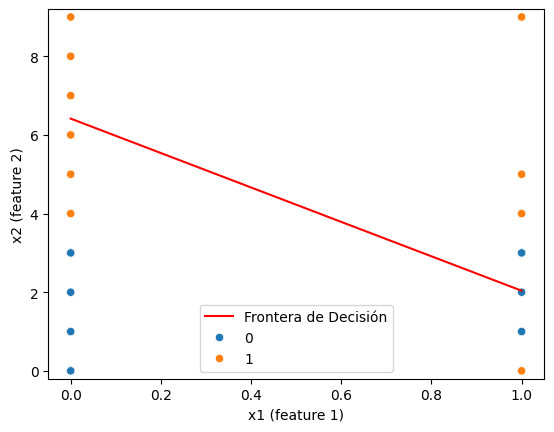

In [66]:
sns.lineplot(x=x_line,
             y=y_line ,
             color='red',
            label='Frontera de Decisión')

sns.scatterplot(x=X[:,0], y=X[:,1], hue=y)

plt.xlabel('x1 (feature 1)')
plt.ylabel('x2 (feature 2)')
plt.ylim(top = X[:,1].max()+0.2, bottom = X[:,1].min()-0.2)
plt.legend(loc='best');

In [67]:
x_1_surf = np.linspace(X[:,0].min(), X[:,0].max())
x_2_surf = np.linspace(X[:,1].min(), X[:,1].max())
x_1_surf, x_2_surf = np.meshgrid(x_1_surf, x_2_surf)
X_surface = pd.DataFrame({'x1': x_1_surf.ravel(), 'x2': x_2_surf.ravel()})
y_pred_surface_prob = classifier.predict_proba(X_surface)
y_pred_surface = y_pred_surface_prob[:, 1]

c:\Users\Fer\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


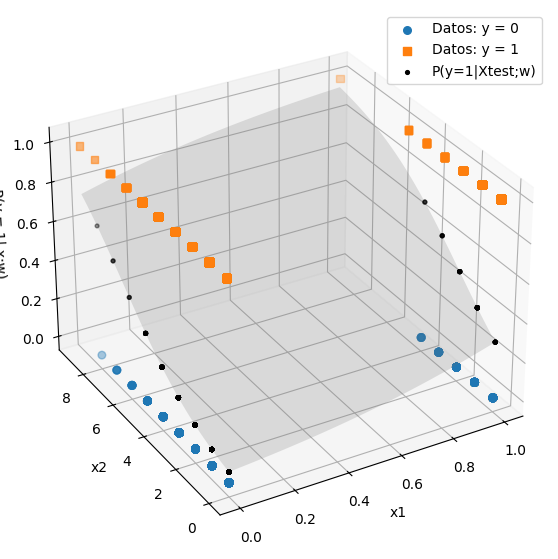

In [68]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection = '3d')
ax.plot_surface(x_1_surf, x_2_surf, y_pred_surface.reshape(x_1_surf.shape),
                rstride=1000,
                cstride=1000,
                color='gray',
                alpha = 0.2)

ax.scatter(X[y == 0, 0], X[y == 0, 1], 0, c='tab:blue', s=30,
            label='Datos: y = 0', marker='o')
ax.scatter(X[y == 1, 0], X[y == 1, 1], 1, c='tab:orange', s=30,
            label='Datos: y = 1', marker='s')
ax.scatter(X_test[:,0], X_test[:,1], probabilidades[:,1], c='black', s=30,
            label='P(y=1|Xtest;w)', marker='.')
plt.xlabel('x1')
plt.ylabel('x2')
ax.set_zlabel('P(y = 1| x;w)')
ax.view_init(30, 240)


plt.legend(loc='best')
plt.show()

Metricas: $$ Accuracy = \frac{valores correctos}{total}$$


$$ Precision = \frac{verdaderos positivos}{verdaderos positivos + falsos positivos}$$

$$ Recall = \frac{verdaderos positivos}{verdaderos positivos + falsos negativos}$$

$$ Fscore = 2 * \frac{precision * recall }{precision + recall}$$

Matriz de confusión:

|.| Prediccion 0| Prediccion 1
|:-| :- | -:
|Real 0| verdadero negativo | Falso positivo
|Real 1| falso negativo | verdadero positivo

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
confusion_matrix(y_test, y_pred_test)

array([[576,   6],
       [ 78,   7]], dtype=int64)

In [71]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred_test)))
print('Precision Score : ' + str(precision_score(y_test,y_pred_test)))
print('Recall Score : ' + str(recall_score(y_test,y_pred_test)))
print('F1 Score : ' + str(f1_score(y_test,y_pred_test)))

Accuracy Score : 0.8740629685157422
Precision Score : 0.5384615384615384
Recall Score : 0.08235294117647059
F1 Score : 0.14285714285714285


#El modelo no es bueno a pesar de tener un buen accuracy score

# Modelo de KKN

#Utilizaremos la clase `KNeighborsClassifier` de sklearn con **los datos de entrenamiento**  para ajustar los parametros del modelo:

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors=5)

#Entrenamiento del modelo

In [74]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#Score de los valores de entrenamiento

In [75]:
knn.score(X_train, y_train)

0.854463615903976

#Score de los valores de test 

In [76]:
knn.score(X_test, y_test)

0.8725637181409296

#Grafico de los datos

In [78]:
x_1_surf = np.linspace(X[:,0].min(), X[:,0].max())
x_2_surf = np.linspace(X[:,1].min(), X[:,1].max())
x_1_surf, x_2_surf = np.meshgrid(x_1_surf, x_2_surf)
X_surface = pd.DataFrame({'x1': x_1_surf.ravel(), 'x2': x_2_surf.ravel()})
y_pred_surface = knn.predict_proba(X_surface.values)[:, 1].reshape(x_1_surf.shape)

Prediccion:  [1]


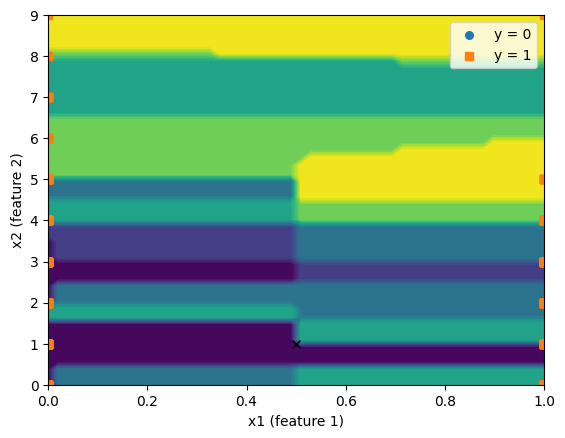

In [81]:
plt.contourf(x_1_surf, x_2_surf, y_pred_surface, 25,
                      vmin=0, vmax=1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='tab:blue', s=30,
            label='y = 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='tab:orange', s=30,
            label='y = 1', marker='s')
plt.plot(0.5,1, marker = 'x', color='black') #Es un punto para probar el modelo
plt.xlabel('x1 (feature 1)')
plt.ylabel('x2 (feature 2)')
plt.legend(loc='best');
print('Prediccion: ', knn.predict([[1,0]]));

#El modelo no es preciso

# Arboles de decisión

In [92]:
df.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


#Pipelines

In [93]:
from sklearn.model_selection import train_test_split

#Se usa Churn como etiqueta, y el resto de las columnas como conjunto de datos de caracteristicas 

In [95]:
X=df.iloc[:,1:]
y=df.Churn

#Divido 20/80 %

In [96]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=33)

#Preprosador de columnas

In [97]:
preproccesor = make_column_transformer(
    (OneHotEncoder(), ['International plan']),
    (OrdinalEncoder(), ['Customer service calls'])
)

In [98]:
preproccesor.fit_transform(X_train)

array([[1., 0., 1.],
       [1., 0., 0.],
       [1., 0., 2.],
       ...,
       [0., 1., 0.],
       [1., 0., 1.],
       [1., 0., 0.]])

In [99]:
X_train_transform = pd.DataFrame(preproccesor.fit_transform(X_train))

#Entrenar el modelo

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [102]:
model_tree = DecisionTreeClassifier()

In [104]:
X_train_transform  #es el nuevo df que voy a utilizar (esta en pandas)

,0,1,2
0,1.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,2.0
3,1.0,0.0,2.0
4,1.0,0.0,0.0
...,...,...,...
2661,1.0,0.0,0.0
2662,1.0,0.0,1.0
2663,0.0,1.0,0.0
2664,1.0,0.0,1.0


#Entenamiento del modelo

In [105]:
model_tree.fit(X_train_transform,y_train)

DecisionTreeClassifier()

#Score de los puntos entrenamiento

In [106]:
model_tree.score(X_train_transform,y_train)

0.8604651162790697

#Gráfico del modelo

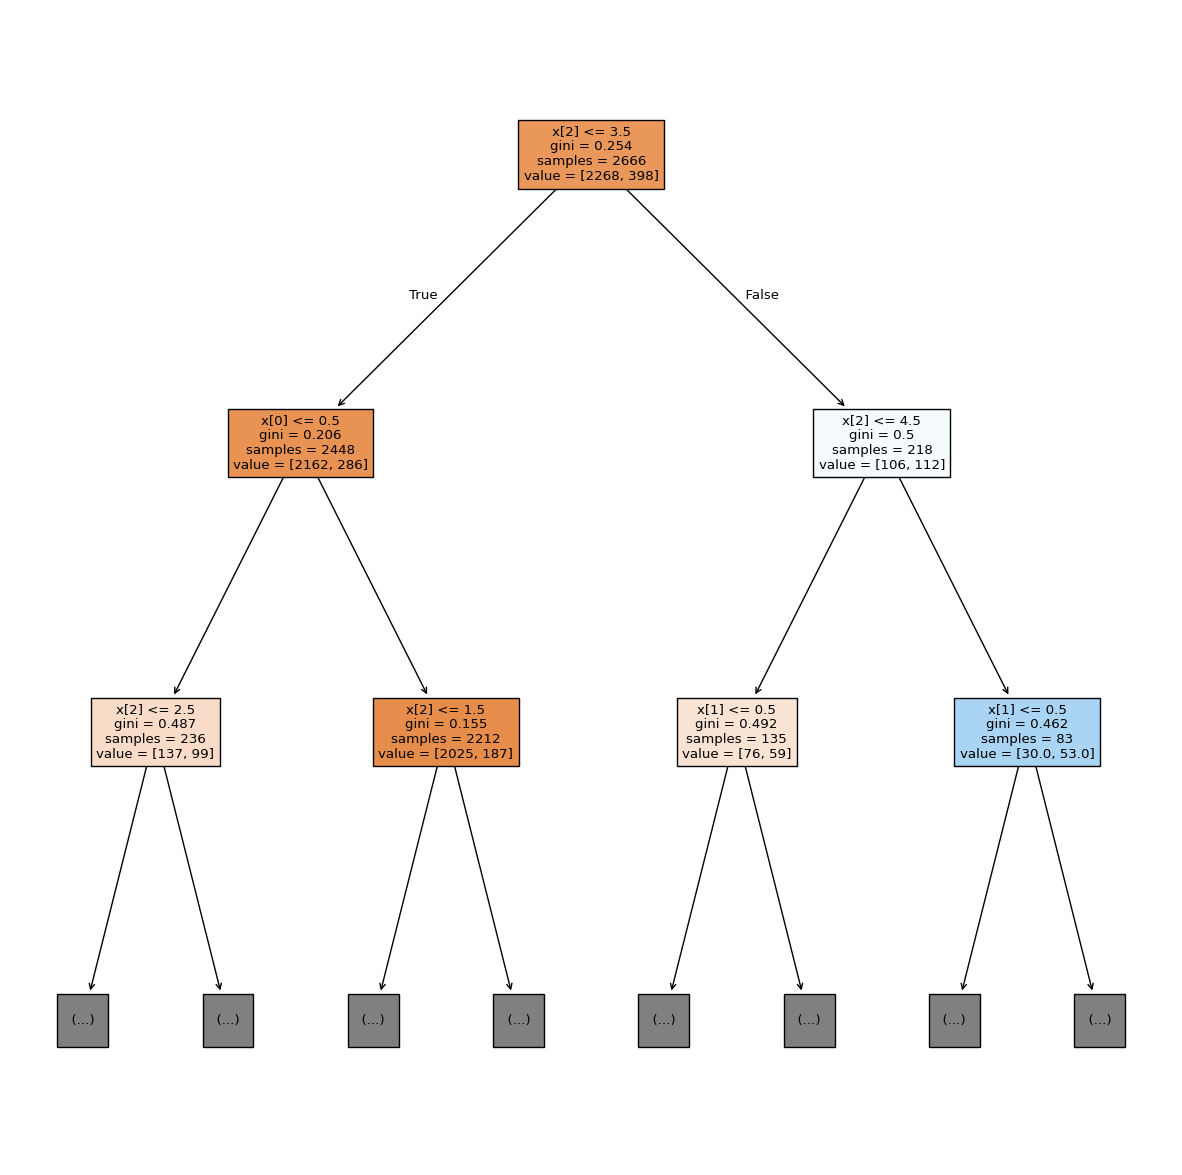

In [107]:
plt.figure(figsize = (15,15))
_= tree.plot_tree(model_tree, filled = True, max_depth = 2)

#Evaluar performace en set de testing. Primero debemos transformar las columnas y luego predecir

In [108]:
X_test.head()

,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2457,415,0,1,45,174.5,120,29.67,217.5,95,18.49,220.3,67,9.91,12.2,2,3.29,1,0
352,408,0,0,0,152.2,112,25.87,177.2,132,15.06,96.4,87,4.34,5.3,3,1.43,1,0
2798,408,0,0,0,54.0,68,9.18,179.3,96,15.24,247.2,101,11.12,10.2,8,2.75,1,0
3275,510,0,1,27,128.5,115,21.85,163.7,91,13.91,242.9,121,10.93,0.0,0,0.00,1,0
1320,415,0,1,31,185.4,105,31.52,197.6,126,16.80,147.1,110,6.62,14.5,4,3.92,2,0


In [109]:
X_test_transform = pd.DataFrame(preproccesor.fit_transform(X_test))

In [110]:
X_test_transform

,0,1,2
0,1.0,0.0,1.0
1,1.0,0.0,1.0
2,1.0,0.0,1.0
3,1.0,0.0,1.0
4,1.0,0.0,2.0
...,...,...,...
662,1.0,0.0,1.0
663,1.0,0.0,4.0
664,1.0,0.0,3.0
665,1.0,0.0,2.0


In [111]:
y_pred = model_tree.predict(X_test_transform)

#Métricas

In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[571,  11],
       [ 74,  11]], dtype=int64)

In [113]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

Accuracy Score : 0.8725637181409296
Precision Score : 0.5
Recall Score : 0.12941176470588237
F1 Score : 0.205607476635514


#El modelo no es bueno, seguramente es un problema de datos 

#Pipeline de entrenamiento

In [115]:
from sklearn.pipeline import make_pipeline

#Crear Pipeline

In [116]:
modeler = make_pipeline(preproccesor,
                        DecisionTreeClassifier())

#Entrenar Pipeline

In [117]:
modeler.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['International plan']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['Customer service '
                                                   'calls'])])),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

#Evaluar score de pipeline con datos de entrenamiento

In [118]:
modeler.score(X_train, y_train)

0.8604651162790697

#Ahora con datos de test

In [119]:
modeler.score(X_test, y_test)

0.8725637181409296

#Matriz de confusión

In [120]:
y_pred=modeler.predict(X_test)

In [121]:
confusion_matrix(y_test, y_pred)

array([[571,  11],
       [ 74,  11]], dtype=int64)

#La matriz de confusión no es buena

# Random Forest

In [123]:
from sklearn.ensemble import RandomForestClassifier

In [124]:
rondom_model = RandomForestClassifier(n_estimators = 5)

In [125]:
rondom_model.fit(X_train_transform , y_train)

RandomForestClassifier(n_estimators=5)

In [126]:
rondom_model.score(X_train_transform, y_train)

0.8604651162790697

In [127]:
rondom_model.score(X_test_transform, y_test)

0.8725637181409296